<a href="https://colab.research.google.com/github/nazmicancalik/n/blob/master/random_normal_mean_diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [116]:
train_images.shape
len(train_labels)
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [117]:
test_images.shape

(10000, 28, 28)

In [118]:
len(test_labels)

10000

Preprocess the data

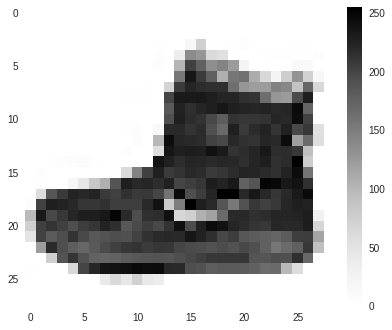

In [119]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Subtract the mean values form each pixel

In [121]:
'''
train_mean = tf.reduce_mean(train_images)
test_mean = tf.reduce_mean(test_images)

train_images = tf.subtract(train_images , train_mean)
test_images = tf.subtract(test_images, test_mean)

print(train_mean)
train_images[0]
'''

'\ntrain_mean = tf.reduce_mean(train_images)\ntest_mean = tf.reduce_mean(test_images)\n\ntrain_images = tf.subtract(train_images , train_mean)\ntest_images = tf.subtract(test_images, test_mean)\n\nprint(train_mean)\ntrain_images[0]\n'

In [122]:
train_mean = np.mean(train_images)
test_mean = np.mean(test_images)

train_images = np.subtract(train_images , train_mean)
test_images = np.subtract(test_images, test_mean)

print(train_mean)

0.2860405969887955


Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

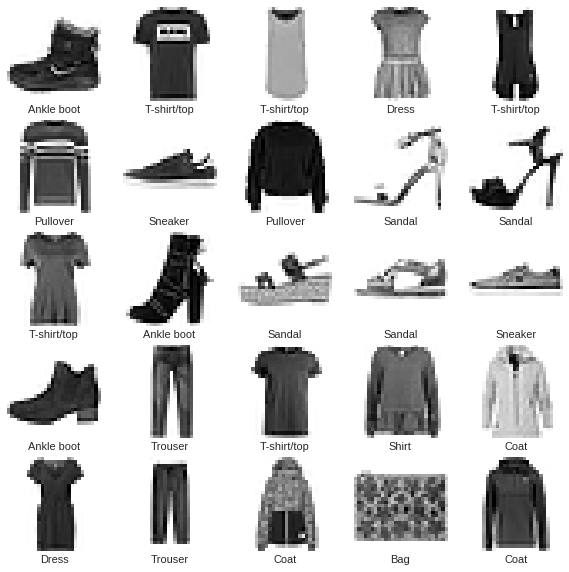

In [123]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

Build the model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu,kernel_initializer='random_normal'),
    keras.layers.Dense(10, activation=tf.nn.softmax, kernel_initializer='random_normal')
])

Compile the model

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [126]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.4730 - acc: 0.8289
Epoch 2/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.3540 - acc: 0.8708
Epoch 3/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.3195 - acc: 0.8814
Epoch 4/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.2946 - acc: 0.8912
Epoch 5/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.2740 - acc: 0.8986


In [127]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 42us/step
Test accuracy: 0.8792


In [128]:
predictions = model.predict(test_images)
predictions[0]

np.argmax(predictions[0])
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

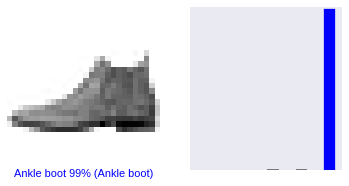

In [130]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

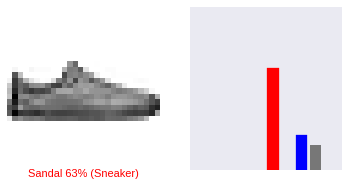

In [131]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

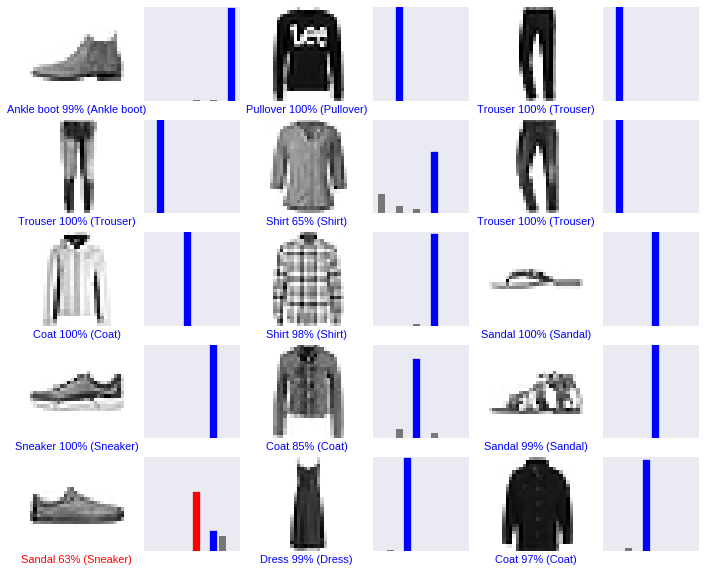

In [132]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [133]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [134]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [135]:
predictions_single = model.predict(img)

print(predictions_single)

[[9.9332356e-06 2.2847324e-05 1.9147103e-07 2.1259165e-08 1.2613874e-06
  5.6313677e-03 1.6143042e-06 4.8262961e-03 3.1431224e-05 9.8947513e-01]]


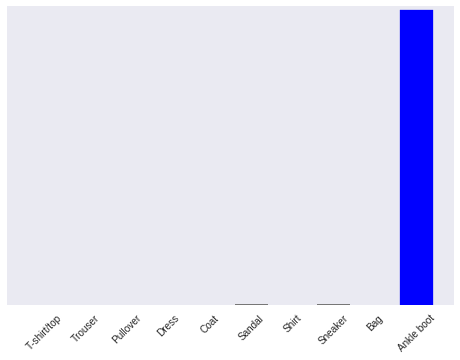

In [136]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [137]:
np.argmax(predictions_single[0])

9